<h1>Candy Hierarchy 2017 Data Analysis</h1>

<img src="https://previews.123rf.com/images/jenifoto/jenifoto1706/jenifoto170600044/80612594-background-of-colorful-assorted-candies-including-lollipops-gum-balls-and-jelly-candies.jpg" >

<h2><a name="contents">Table of Contents</a></h2>

<a  href="#motivation">1.Dataset and Motivation</a>

<a href="#question">2.Research Question</a>

<a href="#review">3.Literature Review</a>

<a href="#clean">4.Quality of Cleaning:</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a.Data Cleaning<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b.Problems we met when cleaning the data and the solutions<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c.Missing Data<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d.Data summary statistics and interpretation

<a href="#visualization">5.Visualization</a> 





<h2>Dataset and Motivation</h2>
<a href="#contents" name="motivation">Go back to table</a>
 
The dataset was created by David Ng and Ben Cohen and published on Boing Boing Oct 30, 2017. 
It includes each interview's age, gender, country, state or province, feeling of 103 kinds of candies, feeling of other candies that the survey does not list, and three questions for scientific purpose that are colors of a dress, favorite day in a week, and preference of four media. 



<h2>Research Question</h2>
<a href="#contents" name="question">Go back to table</a>

This project focus on the popularities of candies in different countries and states, and the gender distribution. Since it is a large datase. we only focus on the other questions rather than scientific questions. The inputs include gender, nationailies,and feelings of candies. We scored each feeling, and by summation, the outcomes were all numbers. The highest number means the most popular. There are three questions we tried to solve:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. What is the most popular candy in US and Canada?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. What is the gender distribution of the survey? <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. What is the most popular candy in Colorado? <br>



<h2>Literature Review</h2>
<a href="#contents" name="review">Go back to table</a>

We found three works from tweet and other website that used the same dataset as ours. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.Candy corn: https://github.com/phoebewong/candy-hierarchy-2017 <br>
This study is trying to solve three questions: How do people feel about candy corn? Is circus peanuts the worst? Should I buy candy corn? It focus on specific candies and does not focus on specific countries or area. <br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Will you be a Halloween hero o the neighborhood dud? http://www.shanellis.com/blog/data-driven-decision-making-halloween-candy-edition/#disqus_thread <br>
The basic qustion this study is trying to solve is what candy to buy for trick-or-treaters? What are the most popular and unpopular candies? It uses the all the data no matther where the interviewer comes from. 
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.Which picture to click: https://github.com/riinuots/candihierarchy/blob/master/README.md <br>
This study only uses the answers for the question when you see the below image of the 4 different websites, click the one that would you most likely check out. It has nothing related to candy. <br><br>

Basicly, the two studies do not focus on the people who from US and Canada. The third study only uses the data of a scientific question. No study claims the genter distribution. Our project cares the data in spesific countries and area, and tries to find the gender distribution of the dataset. 


<h2>Quality of Cleaning</h2>
<a href="#contents" name="clean">Go back to table</a>


<h3>a.Data Cleaning</h3>

This project focus on the people's preferences of candies in US and Canada. Each column is cleaned based on reliability.<br>


In [128]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
candyData = pd.read_csv('candyhierarchy2017.csv',encoding = 'ISO-8859-1')
candyData = candyData.rename(columns={'Q3: AGE': 'Age', 'Q1: GOING OUT?': 'Going_out', 'Q2: GENDER': 'Gender'} )

For "Ging_out" column, unique names are checked. 

In [129]:
candyData['Going_out'].unique() 


array([nan, 'No', 'Yes'], dtype=object)

For "Gender" column, unique genders are checked. 

In [130]:
candyData['Gender'].unique()

array([nan, 'Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

For "Age" column, we changed cells that contains age greater than 105 or less than 5 to NaN. 

In [131]:
candyData['Age'] = candyData['Age'].str.replace('\D+', '  ')
candyData['Age'] = candyData['Age'].str.replace(' ', '')  
candyData['Age'] = pd.to_numeric(candyData['Age'], errors='coerce')
candyData['Age'] = candyData['Age'].replace(2450, np.mean((24,50)))
candyData['Age'] = candyData['Age'].replace(4555, np.mean((45,55)))
candyData['Age'] = candyData['Age'].replace(394, 39)
candyData['Age'] = candyData['Age'].replace(7012, 71)
candyData['Age'] = candyData.Age.mask((candyData['Age'] > 105), np.nan)
candyData['Age'] = candyData.Age.mask((candyData['Age'] < 5), np.nan)
candyData['Age'] = candyData['Age'].replace(np.NaN,'I\'d rather not say')


For "Countries" column, unique countries are checked. Since we focus on US and Canada, other countries are changed to empty. Also, we droped the rows that were not USA nor Canada. 

In [132]:
df_country=candyData['Q4: COUNTRY']
candyData['Q4: COUNTRY'].unique()


array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', '35',
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', '46', 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', '45', 'United State', '32',
       'France', 'australia', 'A', 'Can', 'Canae', 'New York',
       'Trumpistan', 'Ireland', 'United Sates', '

In [133]:
candyData['Q4: COUNTRY']=candyData['Q4: COUNTRY'].str.lower()
usa={'usa', 'murica', 'us', 'united states','america', 'u.s','u s','u.s.', 'u s a', 'unite states', 'united state'}
canadas={'canada', 'can'}
for element in candyData['Q4: COUNTRY']:
    if type(element) is not float:
        for u in usa:
            if u in element:
                candyData['Q4: COUNTRY'] = candyData['Q4: COUNTRY'].replace(element,'USA')
        for c in canadas:
            if c in element:
                candyData['Q4: COUNTRY'] = candyData['Q4: COUNTRY'].replace(element,'Canada')
    
for element in candyData['Q4: COUNTRY']:
    if type(element) is not float:
        if 'USA' not in element and 'Canada' not in element:
            candyData['Q4: COUNTRY'] = candyData['Q4: COUNTRY'].replace(element,np.NaN)

candyData = candyData[pd.notnull(candyData['Q4: COUNTRY'])]

For "State" column, we changed each state to abbreviation. If a state is not in US or Canada, it is changed to NaN. The chunk below needs to run 2 times.

In [136]:
state_dic = {'Alabama':'AL', 'Alaska':'AK', 'Arizona':'AZ', 'Arkansas':'AR', 'California':'CA', 'Colorado':'CO', 
             'Connecticut':'CT', 'Delaware':'DE', 'Florida':'FL', 'Georgia':'GA', 'Hawaii':'HI', 'Idaho':'ID', 
             'Illinois':'IL', 'Indiana':'IN', 'Iowa':'IA', 'Kansas':'KS', 'Kentucky':'KY', 'Louisiana':'LA', 
             'Maine':'ME', 'Maryland':'MD', 'Massachusetts':'MA', 'Michigan':'MI', 'Minnesota':'MN', 'Mississippi':'MS', 
             'Missouri':'MO', 'Montana':'MT', 'Nebraska':'NE', 'Nevada':'NV', 'NewHampshire':'NH', 'NewJersey':'NJ', 
             'NewMexico':'NM', 'NewYork':'NY', 'NorthCarolina':'NC', 'NorthDakota':'ND', 'Ohio':'OH', 'Oklahoma':'OK', 
             'Oregon':'OR', 'Pennsylvania':'PA', 'RhodeIsland':'RI', 'SouthCarolina':'SC', 'SouthDakota':'SD', 
             'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 'Vermont':'VT', 'Virginia':'VA', 'Washington':'WA', 
             'WestVirginia':'WV', 'Wisconsin':'WI', 'Wyoming':'WY', 'AmericanSamoa':'AS', 'DistrictofColumbia':'DC', 
             'FederatedStatesofMicronesia':'FM', 'Guam':'GU', 'MarshallIslands':'MH', 'NorthernMarianaIslands':'MP', 
             'Palau':'PW', 'PuertoRico':'PR', 'VirginIslands':'VI'}

ca_state_dic = {'Ontario':'ON', 'Quebec':'QC', 'NovaScotia':'NS', 'New Brunswick':'NB',
                'Manitoba':'MB', 'BritishColumbia':'BC', 'PrinceEdward':'PE', 'Saskatchewan':'SK',
                'Alberta':'AB', 'NewfoundlandAndLabrador':'NL', 'NorthwestTerritories':'NT',
                'Yukon':'YT', 'Nunavut':'NU'}

for element in candyData['Q5: STATE, PROVINCE, COUNTY, ETC']:
    if type(element) is not float:
        candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element, element.upper().strip())
        for key in state_dic:
            if key.upper() in element.replace(' ',''):
                candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element,state_dic[key])
            if element[:2] == state_dic[key] or element[-2:] == state_dic[key]:
                candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element,state_dic[key])

for element in candyData['Q5: STATE, PROVINCE, COUNTY, ETC']:
    if type(element) is not float:
        candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element, element.upper().strip())
        for key in ca_state_dic:
            if key.upper() in element.replace(' ',''):
                candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element,ca_state_dic[key])
            
            
for element in candyData['Q5: STATE, PROVINCE, COUNTY, ETC']:
    if element not in state_dic.values() and element not in ca_state_dic.values():
        candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element,np.NaN)
        

We focus on the popularities of candies, so columns that have nothing to do with candies are droped. Also, preferences are convered to numbers. A "joy" is 3; a "Meh" is 1, and a"despair" is 0. All scores are added and inserted in to a talbe. 

In [137]:
candyData.drop('Q7: JOY OTHER', axis=1, inplace=True)
candyData.drop('Q8: DESPAIR OTHER', axis=1, inplace=True)
candyData.drop('Q9: OTHER COMMENTS', axis=1, inplace=True)
candyData.drop('Q10: DRESS', axis=1, inplace=True)
candyData.drop('Unnamed: 113', axis=1, inplace=True)
candyData.drop('Q11: DAY', axis=1, inplace=True)
candyData.drop('Q12: MEDIA [Daily Dish]', axis=1, inplace=True)
candyData.drop('Q12: MEDIA [Science]', axis=1, inplace=True)
candyData.drop('Q12: MEDIA [ESPN]', axis=1, inplace=True)
candyData.drop('Q12: MEDIA [Yahoo]', axis=1, inplace=True)
candyData.drop('Click Coordinates (x, y)', axis=1, inplace=True)
candyRank = candyData.drop(candyData.columns[0:5], axis=1, inplace=False)

candyRank.replace('JOY', 3, inplace=True)
candyRank.replace('MEH',1, inplace=True)
candyRank.replace('DESPAIR',0, inplace=True)

candyScore = candyRank.sum()
candyScore_df = pd.DataFrame(data=candyScore, columns=['score'])


<h3>b.Problems we met when cleaning the data and the solutions.</h3>

When we was cleaning the data, there were several problems we met.
<br><br>
Firstly, while cleaning the age column we had some problems with some rows that had strings. Since some of the survey takers didn’t want to disclose their age, they entered some words that didn’t make sense. It was hard figuring out how to deal with those rows since we didn’t want to drop them completely. We tried reading the words and check if some were actual numbers written out and convert them to numbers. From this experience, We learned how hard it can be to clean strings and get useful information from a columns that should only have number. especially when almost all of the data type are different. 
<br><br>
Secondly, in "Country" column, there were many typos such as "unite states", and some people used abbreviation or different names for Amrica. Also, upper case and lower case could be a problem. We builded a set that contained all common typos and different names for America and Canada. Then we used loop to convert this column to lower case and uniformed all names. For example, a typo "unite states" converted to "USA". A "can" converted to "Canada." 
<br><br>
Thirdly, in "State" column, some people put the abbreviation and the city name in the column. For example, exton pa. In this case I check if the first two letter or the last two letter is the state abbreviation. If it is the abbrivation, then only keep and state abbrivation and get rid of the city name.

<h3>c.Missing Data</h3>
<br>
As noted before, we changed useless data to empty, so there were too many empty cells that affected data analysis. Therefore, we convered those empty cell in first 5 columns, which only contained some basic information of the interviewers, to "I'd rather not say." We thought if a person left an answer empty, it meant he did not want to tell his privacy which had same meaning as "I'd rather not say." Also, if an interview left some basic information empty such as "Going_out?" and "Age" but have filled others questions about his preferences of candies in the survey, the data should be considered when we analyzed the result.  

In [138]:
candyData['Going_out'] = candyData['Going_out'].replace(np.NaN,'I\'d rather not say')
candyData['Gender'] = candyData['Gender'].replace(np.NaN,'I\'d rather not say')
candyData['Age'] = candyData['Age'].replace(np.NaN,'I\'d rather not say')
candyData['Q4: COUNTRY'] = candyData['Q4: COUNTRY'].replace(np.NaN,'I\'d rather not say')
candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(np.NaN,'I\'d rather not say') 

<h3>d.Data summary statistics and interpretation</h3>


Overall, there were 2263 people took this survey. We picked all people who were from USA or Canada and converted all feelings to number. 3 is like, 1 is ordinary and 0 is dislike. The outcome is below. 

In [139]:
candyScore_df

,score
Q6 | 100 Grand Bar,3196.0
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),931.0
Q6 | Any full-sized candy bar,4599.0
Q6 | Black Jacks,803.0
Q6 | Bonkers (the candy),1124.0
...,...
Q6 | Vicodin,2244.0
Q6 | Whatchamacallit Bars,2893.0
Q6 | White Bread,310.0
Q6 | Whole Wheat anything,619.0



We also wanted to find if the most popular candy is the same in Colorado, so we selected all people who indicated they were from CO. See the table below. 

In [141]:
CO_data = candyData.loc[candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] == 'CO']


All feelings were converted to numbers as we did for US and Canada and a new data frame was created to store the outcomes. 

In [142]:
CO_Rank = CO_data.drop(candyData.columns[0:6], axis=1, inplace=False)
CO_Rank.replace('JOY', 3, inplace=True)
CO_Rank.replace('MEH',1, inplace=True)
CO_Rank.replace('DESPAIR',0, inplace=True)
CO_Score = CO_Rank.sum()
CO_Score_df = pd.DataFrame(data=CO_Score, columns=['score'])
CO_Score_df

,score
Q6 | 100 Grand Bar,75.0
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),16.0
Q6 | Any full-sized candy bar,92.0
Q6 | Black Jacks,18.0
Q6 | Bonkers (the candy),27.0
...,...
Q6 | Vicodin,38.0
Q6 | Whatchamacallit Bars,68.0
Q6 | White Bread,5.0
Q6 | Whole Wheat anything,19.0



The gender distribution of the dataset was calculated as well. Based on the data frame, there were 1372 male and 793 female took the survey. Also, 71 people did not want to tell the gender and 27 people reported their gender as others rather than male and female. 

In [143]:
gender_count = candyData['Gender'].value_counts()
gender_count_df = pd.DataFrame(data=gender_count)
gender_count_df

,Gender
Male,1372
Female,793
I'd rather not say,71
Other,27


In [144]:
CO_data = candyData.loc[candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] == 'CO']

CO_Gender_Rank = CO_data.drop(candyData.columns[3:5], axis=1, inplace=False)

CO_Gender_Rank = CO_Gender_Rank.drop(CO_Gender_Rank.columns[0:2], axis=1, inplace=False)
CO_Gender_Rank.replace('JOY', 3, inplace=True)
CO_Gender_Rank.replace('MEH',1, inplace=True)
CO_Gender_Rank.replace('DESPAIR',0, inplace=True)

col_list= list(CO_Gender_Rank)
col_list.remove('Gender')
CO_Gender_Rank['score'] = CO_Gender_Rank[col_list].sum(axis=1)


<h2>Visualization</h2>
<a href="#contents" name="visualization">Go back to table</a>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000113F6DD1A58>],
      dtype=object)

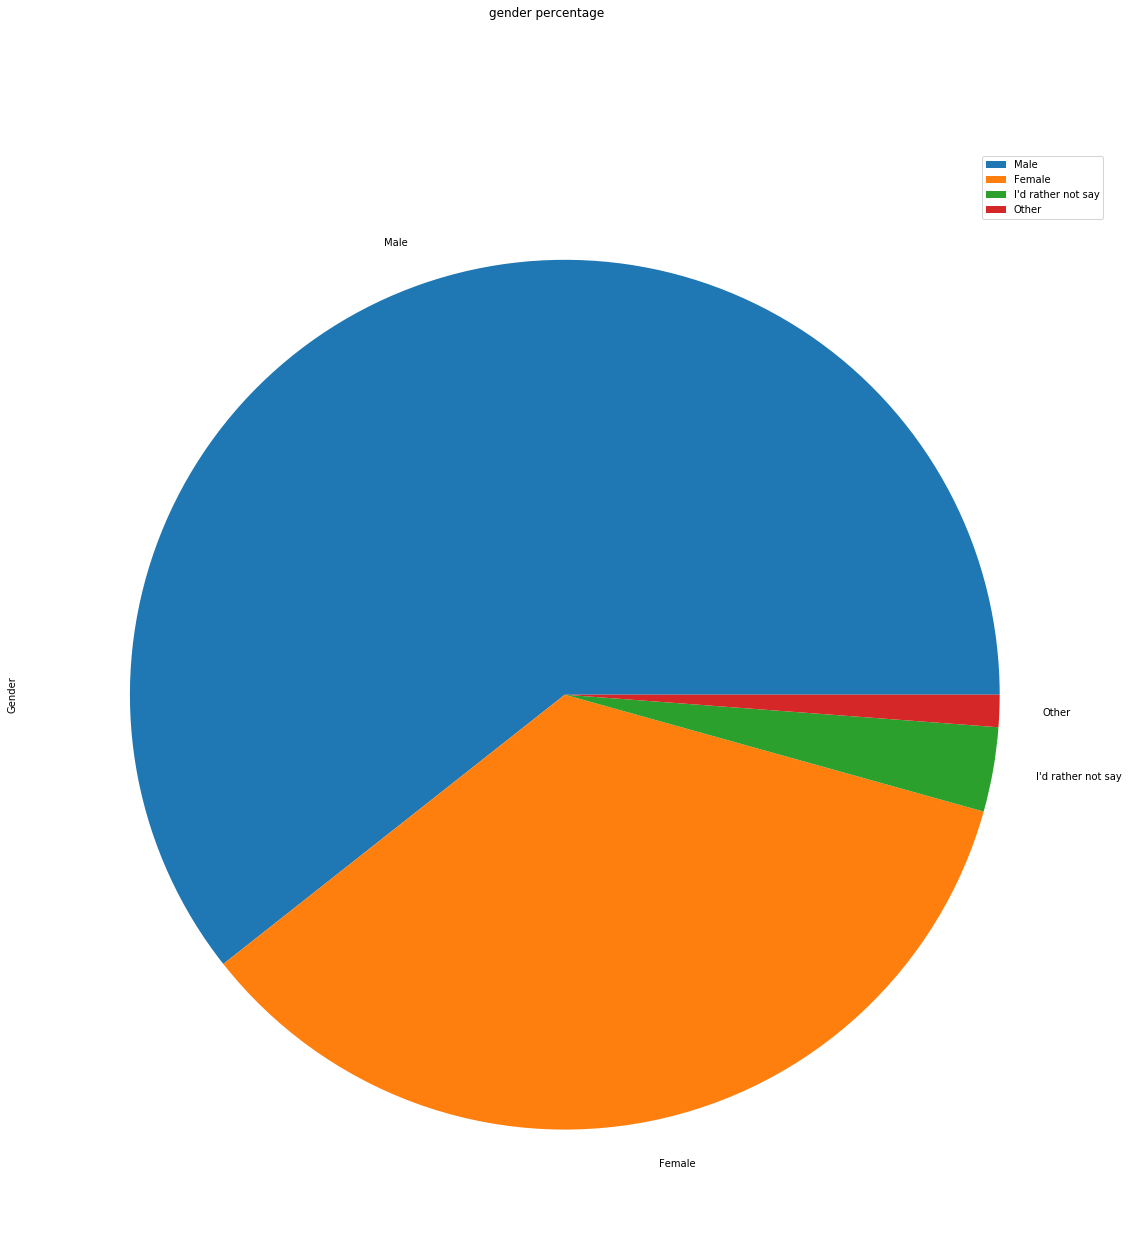

In [124]:
gender_count_df.plot.pie(subplots=True,title='gender percentage')

The pie chart visually shows the gender distribution. The number of male is much more than female. The portion of people who did not want to tell the gender or considered their gender rather than female and male is larger than we expected. 

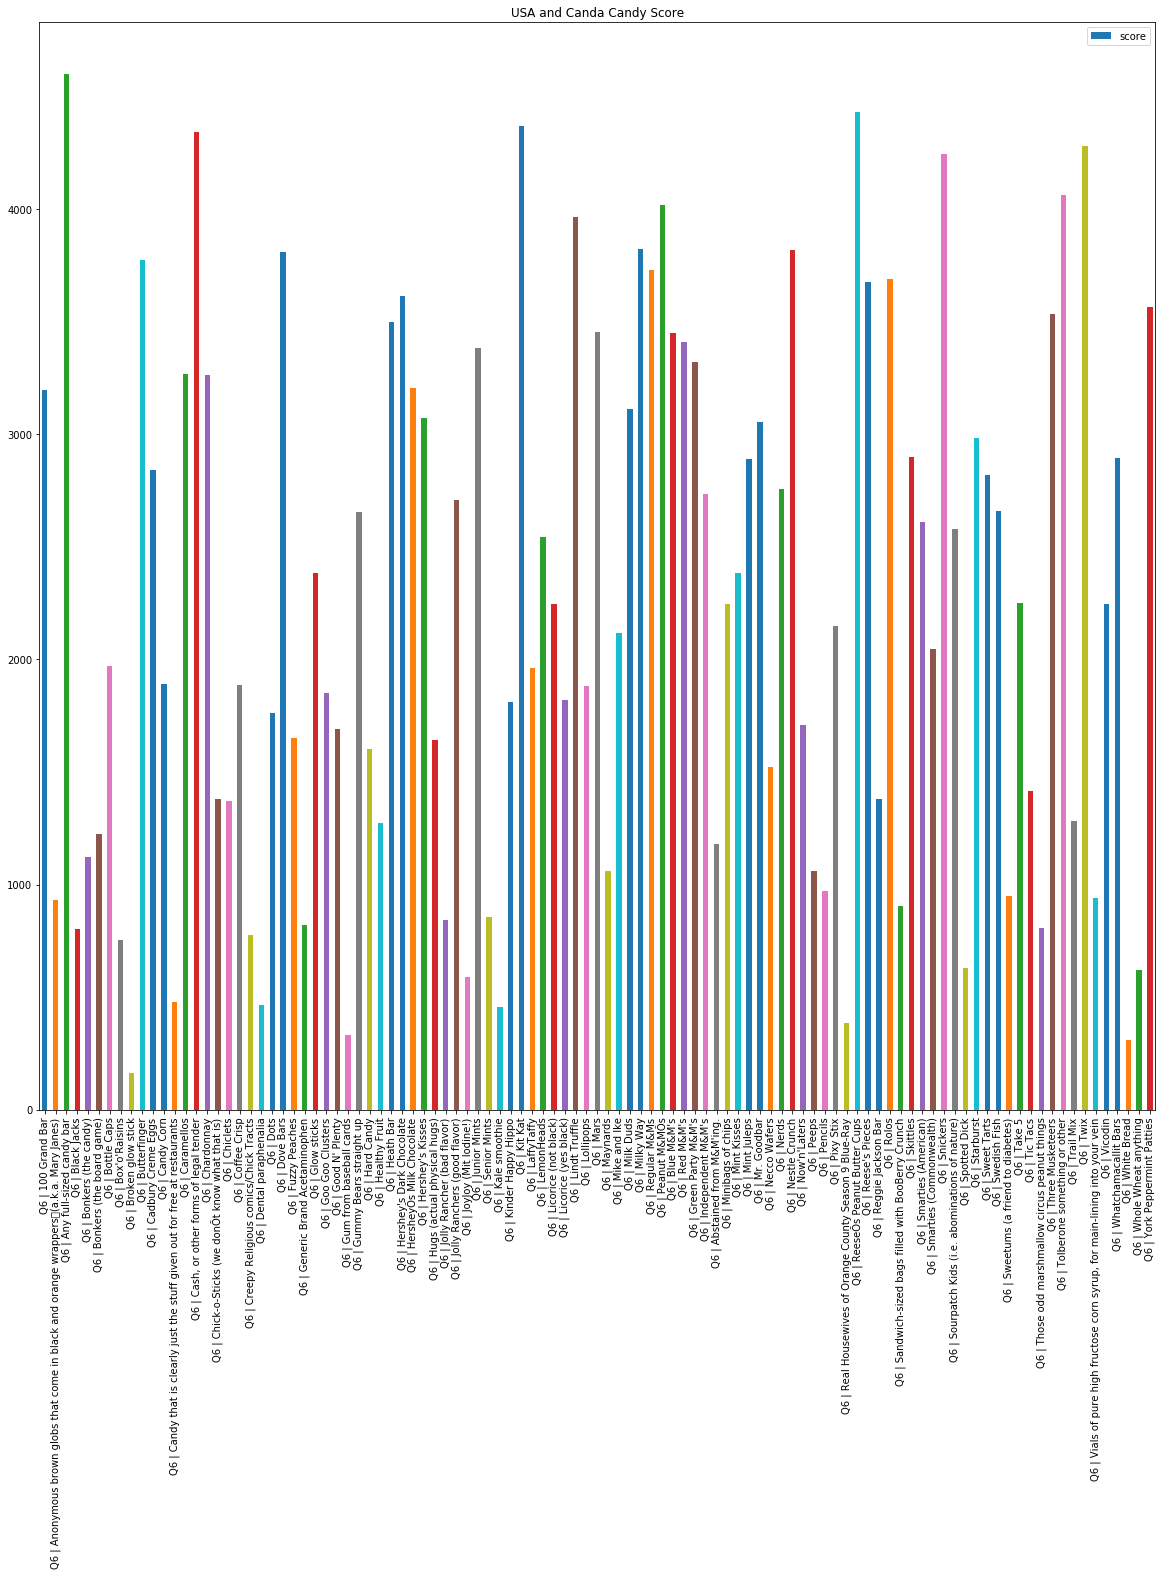

In [125]:
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams['figure.figsize'] = 20, 20
candyScore_df.plot(kind='bar',y='score',title='USA and Canda Candy Score')

This graph reprents the scores of each each candy. We can find the most popular candy with the highest bar. There are three bars have similar height that are cash and other legal tender, Kit Kat and ReeseOs Peanut Butter Cups. The broken glow stick gets the lowest score. 

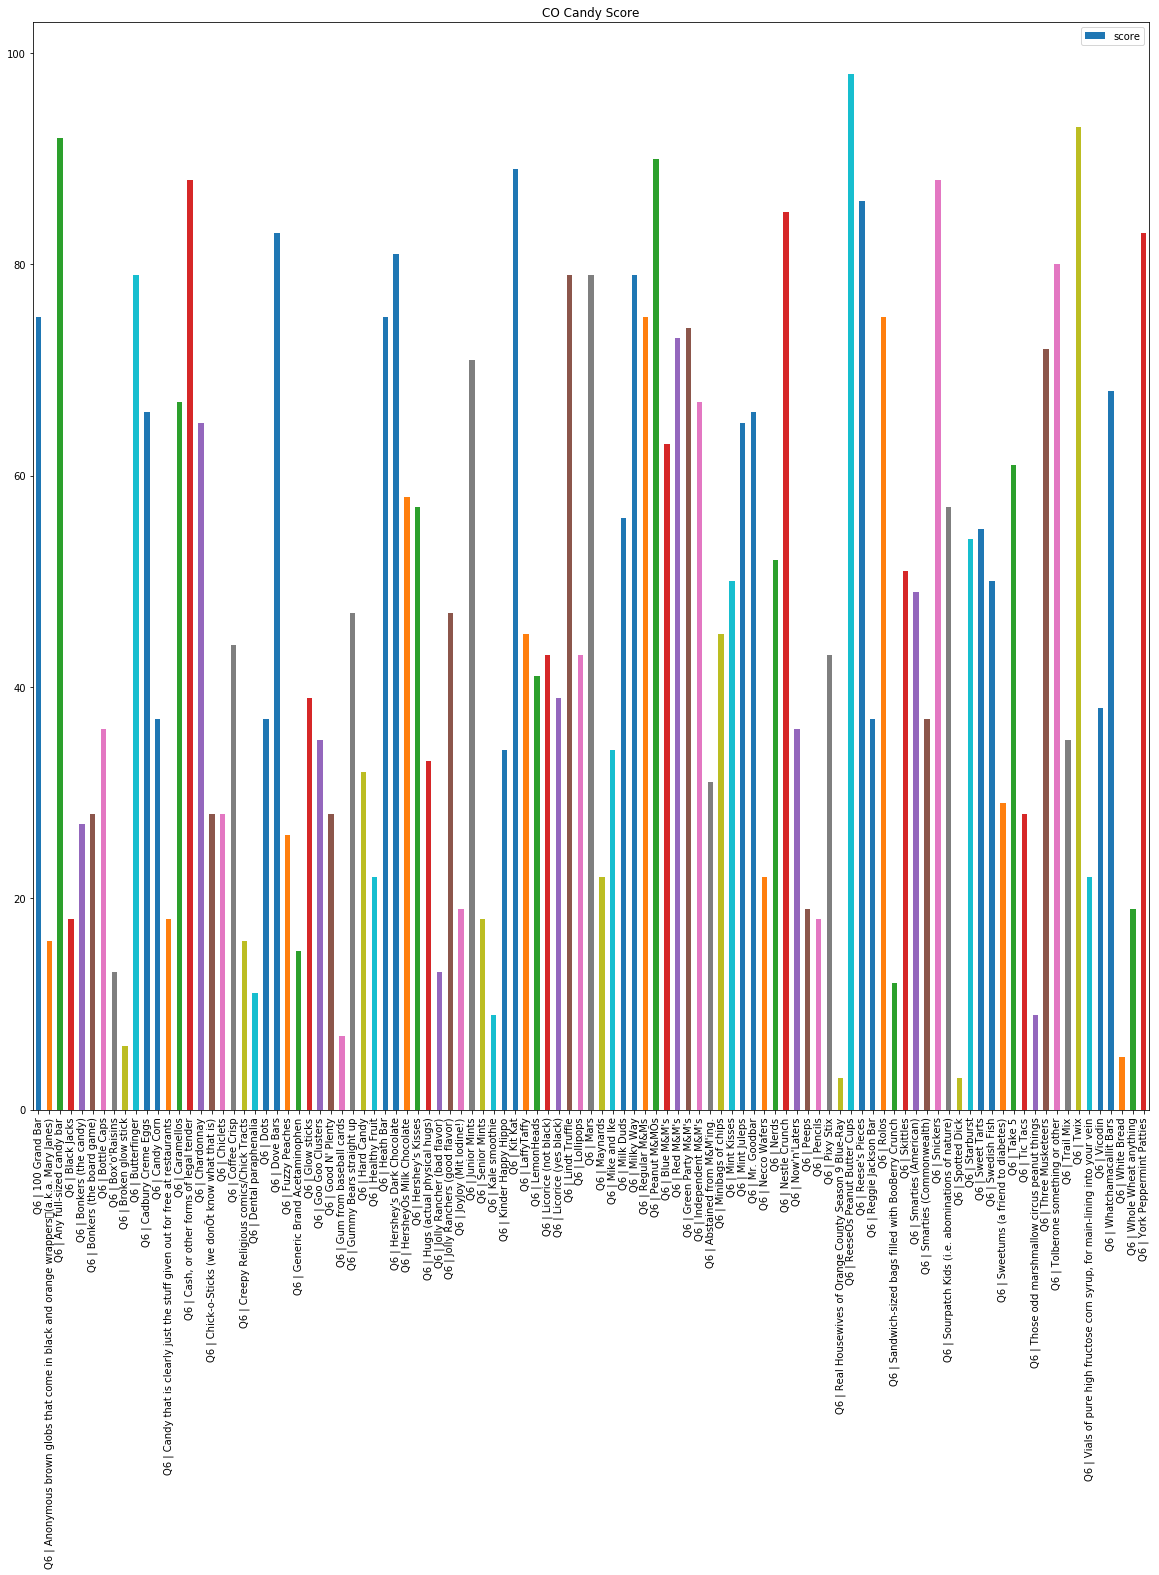

In [126]:
CO_Score_df.plot(kind='bar',y='score',title='CO Candy Score')

When the categories are less than 5, pie chart is helpful to understand the distribution. As the gender distribution chart, there are 4 categories, so we can easily find the proportion of male is more than 50%. However, if there are too many variables, a pie chart does not work, but a bar plot works. To detect the popularities of 103 kinds of candies, a bar plot describes the scores of each candy, and by looking the plot, we can easily notice the highest bar and find the candy that bar represents. Before we did the plot, the dataset is cleaned, so there was no outlier. 

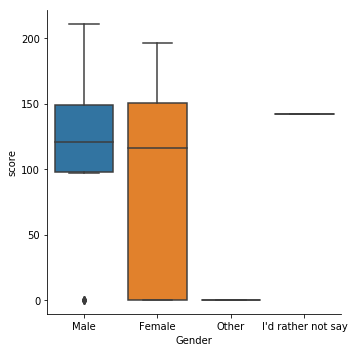

In [127]:
sns.catplot(x="Gender", y="score", kind="box", data=CO_Gender_Rank);

The interquartile range for male is more narrow than female's. Based on the graph, we can tell females have more strong feeling for candies. They  